In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from pycocotools.coco import COCO
import re
import os

In [2]:
with open('../mmdetection/result/retinanet_swin-l/result.bbox.json', 'r') as f:
    swin_data = json.load(f)

with open('../mmdetection/result/faster_rcnn/result.bbox.json', 'r') as f:
    rcnn_data = json.load(f)

with open('../yolov7/runs/test/yolov7_640_val2/last_predictions.json', 'r') as f:
    yolo_data = json.load(f)

In [3]:
coco = COCO('../info/test.json')

img_path_to_id = {re.sub('.jpg', '', os.path.basename(
    x['file_name'])): x['id'] for x in coco.loadImgs(coco.getImgIds())}

for i in range(len(yolo_data)):
    yolo_data[i]['image_id'] = img_path_to_id[yolo_data[i]['image_id']]
    yolo_data[i]['category_id'] += 1

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [4]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

coco_gld = COCO('../info/test.json')
coco_rst = coco_gld.loadRes('../mmdetection/result/retinanet_swin-l/result.bbox.json')
cocoEval = COCOeval(coco_gld, coco_rst, iouType='bbox')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.559
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.862
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.646
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.353
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.609
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.622
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.641
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [6]:
cocoEval.accumulate()

Accumulating evaluation results...
DONE (t=0.03s).


In [21]:
coco.loadAnns(coco_gld.getAnnIds())[1]

{'id': 5,
 'category_id': 1,
 'bbox': [275, 247, 64, 68],
 'image_id': 5,
 'area': 4352,
 'iscrowd': 0}

In [23]:
cocoEval.computeIoU(imgId=5 , catId=1)

array([[0.80889633],
       [0.49119999],
       [0.14260083]])

In [57]:
len(coco_rst.getAnnIds(imgIds=5))

7

In [84]:
cocoEval.evaluateImg(imgId = 5 , catId = 2 , aRng = [10, 100 ,1000]  , maxDet=100)

{'image_id': 5,
 'category_id': 2,
 'aRng': [10, 100, 1000],
 'maxDet': 100,
 'dtIds': [520, 521, 522, 523],
 'gtIds': [],
 'dtMatches': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'gtMatches': array([], shape=(10, 0), dtype=float64),
 'dtScores': [0.3941749930381775,
  0.09402159601449966,
  0.08925708383321762,
  0.05014302581548691],
 'gtIgnore': array([], dtype=float64),
 'dtIgnore': array([[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])}

In [85]:
data = cocoEval.accumulate()
print('hello')

Accumulating evaluation results...
DONE (t=0.04s).
hello


In [86]:
coco.loadCats(coco_rst.getCatIds())

[{'id': 1, 'name': 'over', 'supercategory': 'defect'},
 {'id': 2, 'name': 'under', 'supercategory': 'defect'},
 {'id': 3, 'name': 'non-welding', 'supercategory': 'defect'}]

In [87]:
cocoEval.eval['precision'].shape

(10, 101, 3, 4, 3)

In [88]:
cocoEval.eval['recall'].shape

(10, 3, 4, 3)

In [89]:
cocoEval.stats

array([0.55880215, 0.86151748, 0.64595914, 0.35346535, 0.25583734,
       0.60943532, 0.62160948, 0.64105392, 0.64244281, 0.35      ,
       0.38571429, 0.69313725])

In [90]:
cocoEval.eval['counts']

[10, 101, 3, 4, 3]

In [93]:
cocoEval.eval['precision'][:,:,0,:,:].shape

(10, 101, 4, 3)

In [107]:
np.unique(cocoEval.eval['precision'][:,:,0,:,:])

array([0.        , 0.04651163, 0.09422492, 0.10194175, 0.11246201,
       0.11904762, 0.12349398, 0.12462006, 0.12765957, 0.13289037,
       0.13333333, 0.14563107, 0.14754098, 0.15254237, 0.16666667,
       0.17475728, 0.17486339, 0.18932039, 0.19251337, 0.19459459,
       0.2       , 0.20710059, 0.21621622, 0.22033898, 0.22857143,
       0.23404255, 0.23809524, 0.25217391, 0.26271186, 0.27272727,
       0.28571429, 0.29166667, 0.29824561, 0.3030303 , 0.30434783,
       0.30769231, 0.31372549, 0.32051282, 0.32142857, 0.33333333,
       0.35      , 0.35897436, 0.36170213, 0.36363636, 0.37142857,
       0.37837838, 0.38095238, 0.38461538, 0.39393939, 0.4       ,
       0.4057971 , 0.40909091, 0.4137931 , 0.43859649, 0.44      ,
       0.44230769, 0.45454545, 0.46153846, 0.47058824, 0.47619048,
       0.48      , 0.48571429, 0.48648649, 0.48888889, 0.49275362,
       0.5       , 0.51515152, 0.51724138, 0.52631579, 0.53571429,
       0.53846154, 0.54545455, 0.54761905, 0.55072464, 0.55102

In [114]:
cocoEval.evaluateImg(imgId = 5 , catId= 1 , aRng = [0 , 100000000.0] , maxDet = 10)['dtScores']

[0.8735492825508118, 0.11685810983181, 0.07602743059396744]

In [115]:
results = cocoEval.eval

In [117]:
results['precision'].shape

(10, 101, 3, 4, 3)

In [118]:
results['recall'].shape

(10, 3, 4, 3)

In [134]:
results['precision'][0,:,0 , 0 , -1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.875     , 0.875     ,
       0.81481481, 0.81481481, 0.81481481, 0.81481481, 0.81481481,
       0.81481481, 0.81481481, 0.81481481, 0.81481481, 0.81481481,
       0.81481481, 0.81481481, 0.81481481, 0.81481481, 0.81481481,
       0.81481481, 0.81481481, 0.81481481, 0.81481481, 0.81481481,
       0.81481481, 0.81481481, 0.81481481, 0.81481481, 0.81481481,
       0.81481481, 0.81481481, 0.81481481, 0.81481481, 0.81481481,
       0.81481481, 0.79310345, 0.79310345, 0.6875    , 0.6875    ,
       0.6875    , 0.6875    , 0.6875    , 0.6875    , 0.6875    ,
       0.6875    , 0.6875    , 0.6875    , 0.6875    , 0.6875    ,
       0.6875    , 0.6875    , 0.6875    , 0.6875    , 0.6875    ,
       0.6875    , 0.6875    , 0.6875    , 0.6875    , 0.68      ,
       0.68      , 0.67307692, 0.67307692, 0.65454545, 0.65454

In [137]:
results['precision'][0,:, :, 0 , -1].mean()

0.8615174803501252

In [139]:
# IoU thrs 0.5 , catids = 0 , area : all , mDets = 1000
results['recall'][:, :,0, -1].mean()

0.6424428104575164

In [133]:
cocoEval.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.559
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.862
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.646
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.353
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.609
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.622
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.641
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.642
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.350
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.693


In [143]:
x = np.linspace(0 ,1 ,101)
y = results['precision'][0,:, 0, 0 , -1]


In [144]:
import matplotlib.pyplot as plt

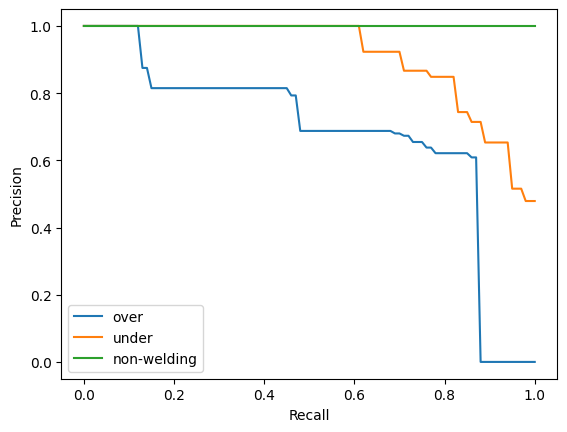

In [152]:
x = np.linspace(0 ,1 ,101)
y1 = results['precision'][0,:, 0, 0 , -1]
y2 = results['precision'][0,:, 1, 0 , -1]
y3 = results['precision'][0,:, 2, 0 , -1]
plt.plot(x , y1 , label = 'over')
plt.plot(x , y2 , label = 'under')
plt.plot(x , y3 , label = 'non-welding')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [654]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

coco_gt = COCO('../info/test.json')
coco_pred = coco_gld.loadRes('../mmdetection/result/retinanet_swin-l/result.bbox.json')
cocoEval = COCOeval(coco_gt, coco_pred, iouType='bbox')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.559
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.862
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.646
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.353
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.609
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.622
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.641
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [172]:
coco.loadAnns(coco_gt.getAnnIds(imgIds = 5))

[{'id': 5,
  'category_id': 1,
  'bbox': [275, 247, 64, 68],
  'image_id': 5,
  'area': 4352,
  'iscrowd': 0}]

In [181]:
[x['category_id'] for x in coco_pred.loadAnns(coco_pred.getAnnIds(imgIds = 5))]

[1, 1, 1, 2, 2, 2, 2]

In [195]:
ground_truth = cocoEval.evaluateImg( imgId  = 5 , catId=1, aRng =[0 , 100000], maxDet = 1000 , )['gtMatches'][0]

array([517.])

In [188]:
predictions = cocoEval.evaluateImg( imgId  = 5 , catId=1, aRng =[0 , 100000], maxDet = 1000)['dtMatches'][0]

array([5., 0., 0.])

In [200]:
len(coco_gt.getImgIds())

472

In [503]:

confidence_score = 0
prediction_list = []
confidence_list = []
for img_id in sorted(coco_gt.getImgIds()):
    result = cocoEval.evaluateImg( imgId  = img_id , catId=1, aRng =[0 , 100000], maxDet = 1000)
    if result:
        # 0 idx => IoU thrs 0.5
        predictions = result['dtMatches'][0,:] 
        confidence = result['dtScores']

        prediction_list.append(predictions.tolist())
        confidence_list.append(confidence)
prediction_list = [ y for x in prediction_list for y in x]
confidence_list = [ y for x in confidence_list for y in x]
data = np.array([prediction_list , confidence_list])
data = data[: , data[1,:] >= confidence_score]
precision = np.count_nonzero(data[0,:]) / len(data[0,:])
print(precision)

0.11965811965811966


In [504]:
len(prediction_list)

351

In [505]:
len(coco_pred.getAnnIds())

619

In [373]:
np.count_nonzero(data[0,:]) / len(data[0,:])

0.6410256410256411

In [336]:
pred

[[],
 [],
 [5.0, 0.0, 0.0],
 [0.8735492825508118, 0.11685810983181, 0.07602743059396744],
 [9.0, 0.0],
 [0.3545074462890625, 0.05374220758676529],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5275458097457886,
  0.12779046595096588,
  0.09455588459968567,
  0.08132509887218475,
  0.07176046818494797,
  0.06212059408426285],
 [14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.8540156483650208,
  0.5679337978363037,
  0.2725614905357361,
  0.1974586695432663,
  0.158560648560524,
  0.14977291226387024,
  0.06323748826980591],
 [0.0, 0.0, 0.0],
 [0.5742239952087402, 0.16144630312919617, 0.09747128188610077],
 [0.0],
 [0.10181689262390137],
 [30.0],
 [0.5804053544998169],
 [0.0, 0.0],
 [0.2250528186559677, 0.05057957395911217],
 [55.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.44662150740623474,
  0.2044558972120285,
  0.14901220798492432,
  0.11860290914773941,
  0.08162694424390793,
  0.060849085450172424,
  0.05782020464539528],
 [62.0, 0.0],
 [0.2856248915195465, 0.05922086536884308],
 [0.0],
 [0.08675278723

In [321]:
results = cocoEval.evaluateImg( imgId  = 5 , catId=1, aRng =[0 , 100000], maxDet = 1000)

In [327]:
np.append(results['dtMatches'][0 , :] , results['dtScores'])

array([5.        , 0.        , 0.        , 0.87354928, 0.11685811,
       0.07602743])

In [334]:
np.concatenate( [[results['dtMatches'][0 , :]], [results['dtScores']]] , axis = 0)

array([[5.        , 0.        , 0.        ],
       [0.87354928, 0.11685811, 0.07602743]])

In [739]:
def get_conf_list(result):
    conf_list = []
    for idx in result['gtMatches'][0,:]:
        if idx == 0:
            conf_list.append(0)
        else:
            gt_idx = np.where(result['dtIds'] == idx)
            conf_list.append(float(np.array(result['dtScores'])[gt_idx]))
    return conf_list

In [524]:

confidence_score = 0
truth_list = []
confidence_list = []
for img_id in sorted(coco_gt.getImgIds()):
    result = cocoEval.evaluateImg( imgId  = img_id , catId=3, aRng =[0 , 100000], maxDet = 1000)
    if result:
        # 0 idx => IoU thrs 0.5
        truth = result['gtMatches'][0,:] 
        confidence = get_conf_list(result)

        truth_list.append(truth.tolist())
        confidence_list.append(confidence)
        
truth_list = [ y for x in truth_list for y in x]
confidence_list = [ y for x in confidence_list for y in x]

data = np.array([truth_list , confidence_list])
data = data[: , data[1,:] >= confidence_score]
recall = np.count_nonzero(data[0,:]) / len(data[0,:])
print(recall)

1.0


In [526]:
len(coco_gt.getAnnIds())

85

In [525]:
len(truth_list)

3

In [518]:
for img_id in sorted(coco_gt.getImgIds()):
    result = cocoEval.evaluateImg( imgId  = img_id , catId=1, aRng =[0 , 100000], maxDet = 1000)
    if result:
        # 0 idx => IoU thrs 0.5
        truth = result['gtMatches'][0,:] 


In [515]:
len(truth_list)

48

In [740]:
conf_score = 0.8
def get_conf_list(result):
    conf_list = []
    for idx in result['gtMatches'][0,:]:
        if idx == 0:
            conf_list.append(0)
        else:
            gt_idx = np.where(result['dtIds'] == idx)
            conf_list.append(float(np.array(result['dtScores'])[gt_idx]))
    return conf_list
def get_PR(coco_gt  , cocoEval , conf_score , catId):
    pred_list = []
    truth_list = []
    pred_conf_list = []
    truth_conf_list = []
    for img_id in sorted(coco_gt.getImgIds()):
        result = cocoEval.evaluateImg( imgId  = img_id , catId=catId, aRng =[0 , 100000], maxDet = 1000)
        
        if result:
            # 0 idx => IoU thrs 0.5
            pred = result['dtMatches'][0,:] 
            pred_conf = result['dtScores']

            pred_list.append(pred.tolist())
            pred_conf_list.append(pred_conf)

            truth = result['gtMatches'][0,:] 
            confidence = get_conf_list(result)

            truth_list.append(truth.tolist())
            truth_conf_list.append(confidence)

    pred_list = [ y for x in pred_list for y in x]
    pred_conf_list = [ y for x in pred_conf_list for y in x]

    pred_data = np.array([pred_list , pred_conf_list])
    pred_data = pred_data[: , pred_data[1,:] >= conf_score]
    precision = np.count_nonzero(pred_data[0,:]) / len(pred_data[0,:])

    truth_list = [ y for x in truth_list for y in x]
    truth_conf_list = [ y for x in truth_conf_list for y in x]

    truth_data = np.array([truth_list , truth_conf_list])
    truth_data = truth_data[1,:] >= conf_score
    recall = np.count_nonzero(truth_data) / len(truth_data)
    return precision , recall

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.04s).


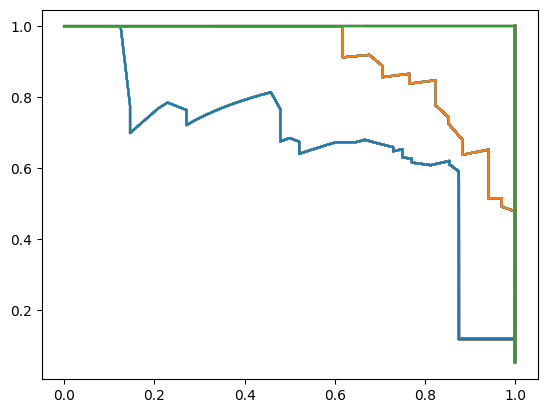

In [745]:
cocoEval = COCOeval(coco_gt, coco_pred, iouType='bbox')
cocoEval.evaluate()
cocoEval.accumulate()

for catId in range(1,4):
    cat_list = []
    p_list = []
    r_list = []
    for conf in np.linspace(.0, 1, int(np.round((1.00 - .0) / .01)) + 1, endpoint=False) :
        try:
            p , r = get_PR(coco_gt  , cocoEval, conf , catId=catId)
            p_list.append(p)
            r_list.append(r)
            cat_list.append(catId)
        except:
            p_list.append(1)
            r_list.append(0)
            cat_list.append(catId)
        plt.plot(r_list , p_list)

In [744]:
r_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333]

In [713]:
id_to_cat = {x['id'] : x['name'] for x in coco.loadCats(coco.getCatIds())}

In [716]:
id_to_cat

{1: 'over', 2: 'under', 3: 'non-welding'}

In [718]:
df = pd.DataFrame({'precision' : p_list , 'recall' : r_list , 'category' : cat_list} )
df['category'] = df['category'].apply(lambda x: id_to_cat[x])

<AxesSubplot:xlabel='recall', ylabel='precision'>

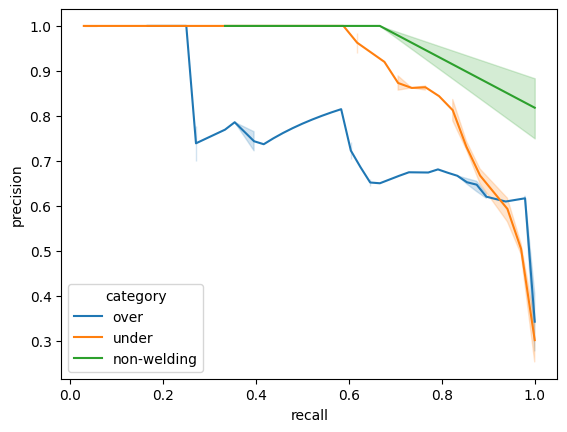

In [722]:
import seaborn as sns
sns.lineplot(x = 'recall' , y = 'precision' ,data = df , hue = 'category')

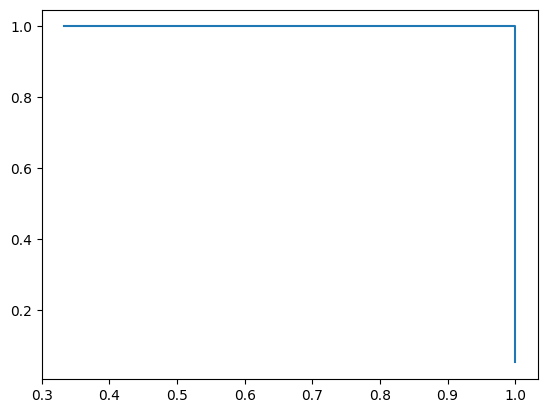

In [704]:
plt.plot(r_list , p_list)

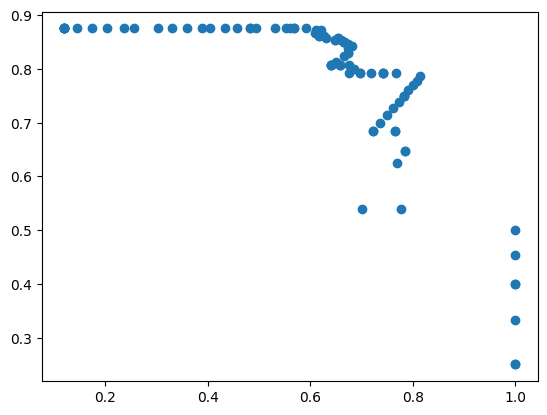

In [633]:
plt.scatter(p_list , r_list[:])

In [738]:

def get_conf_list(result):
    conf_list = []
    for idx in result['gtMatches'][0,:]:
        if idx == 0:
            conf_list.append(0)
        else:
            gt_idx = np.where(result['dtIds'] == idx)
            conf_list.append(float(np.array(result['dtScores'])[gt_idx]))
    return conf_list
    
confidence_score = 0.5
truth_list = []
confidence_list = []
for img_id in sorted(coco_gt.getImgIds()):
    result = cocoEval.evaluateImg( imgId  = img_id , catId=2, aRng =[0 , 100000], maxDet = 1000)
    if result:
        # 0 idx => IoU thrs 0.5
        truth = result['gtMatches'][0,:] 
        confidence = get_conf_list(result)

        truth_list.append(truth.tolist())
        confidence_list.append(confidence)
        
truth_list = [ y for x in truth_list for y in x]
confidence_list = [ y for x in confidence_list for y in x]

data = np.array([truth_list , confidence_list])
data = data[1,:] >= confidence_score
recall = np.count_nonzero(data) / len(data)
print(recall)

0.7647058823529411


In [737]:
max(confidence_list)

0.9036612510681152

In [ ]:
def get_conf_list(result):
    conf_list = []
    for idx in result['gtMatches'][0,:]:
        if idx == 0:
            conf_list.append(1)
        else:
            gt_idx = np.where(result['dtIds'] == idx)
            conf_list.append(float(np.array(result['dtScores'])[gt_idx]))
    return conf_list

In [731]:
coco_gld = COCO('../info/test.json')
coco_rst = coco_gld.loadRes('../mmdetection/result/retinanet_swin-l/result.bbox.json')
cocoEval = COCOeval(coco_gld, coco_rst, iouType='bbox')
cocoEval.evaluate()
cocoEval.accumulate()
# cocoEval.summarize()
cocoEval.evaluateImg( imgId  = 5 , catId=1, aRng =[0 , 100000], maxDet = 1000)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.23s).
Accumulating evaluation results...
DONE (t=0.04s).


{'image_id': 5,
 'category_id': 1,
 'aRng': [0, 100000],
 'maxDet': 1000,
 'dtIds': [517, 518, 519],
 'gtIds': [5],
 'dtMatches': array([[5., 0., 0.],
        [5., 0., 0.],
        [5., 0., 0.],
        [5., 0., 0.],
        [5., 0., 0.],
        [5., 0., 0.],
        [5., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'gtMatches': array([[517.],
        [517.],
        [517.],
        [517.],
        [517.],
        [517.],
        [517.],
        [  0.],
        [  0.],
        [  0.]]),
 'dtScores': [0.8735492825508118, 0.11685810983181, 0.07602743059396744],
 'gtIgnore': array([0]),
 'dtIgnore': array([[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]])}

In [641]:
len(truth_list)

34

In [644]:
confidence_list

[0.6817493438720703,
 0.8125596046447754,
 0.8193249106407166,
 0.3350338935852051,
 0.6666424870491028,
 0.5752280354499817,
 0.3966442942619324,
 0.8069427609443665,
 0.606370210647583,
 0.22105799615383148,
 0.8189603090286255,
 0.8655221462249756,
 0.8607237935066223,
 0.33420851826667786,
 0.8850677013397217,
 0.3696485757827759,
 0.7963206171989441,
 0.7418439388275146,
 0.8357021808624268,
 0.843212366104126,
 0.7626256942749023,
 0.5379993915557861,
 0.4481239914894104,
 0.8600638508796692,
 0.7573201656341553,
 0.9036612510681152,
 0.4377498924732208,
 0.6137418746948242,
 0.8649479150772095,
 0.7510531544685364,
 0.6037837266921997,
 0.674949049949646,
 0.8354804515838623,
 0.2410130351781845]

In [643]:
confidence_list

[0.6817493438720703,
 0.8125596046447754,
 0.8193249106407166,
 0.3350338935852051,
 0.6666424870491028,
 0.5752280354499817,
 0.3966442942619324,
 0.8069427609443665,
 0.606370210647583,
 0.22105799615383148,
 0.8189603090286255,
 0.8655221462249756,
 0.8607237935066223,
 0.33420851826667786,
 0.8850677013397217,
 0.3696485757827759,
 0.7963206171989441,
 0.7418439388275146,
 0.8357021808624268,
 0.843212366104126,
 0.7626256942749023,
 0.5379993915557861,
 0.4481239914894104,
 0.8600638508796692,
 0.7573201656341553,
 0.9036612510681152,
 0.4377498924732208,
 0.6137418746948242,
 0.8649479150772095,
 0.7510531544685364,
 0.6037837266921997,
 0.674949049949646,
 0.8354804515838623,
 0.2410130351781845]